In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('src/household_power_consumption.txt', sep=';', na_values=['?', ''])

In [28]:
# преобразуем форматы даты и времени и соединяем в одну колонку
df['dt'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%d/%m/%Y %H:%M:%S'
)

df = df.set_index('dt')

df = df.drop(columns=['Date', 'Time'])

In [30]:
droping_list_all=[]
for j in range(0, 7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [31]:
for j in range(0,7):
    df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [32]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [104]:
# выбран другой диапазон, т.к. из двух последних месяцев один с пропущенными значениями
start_date = '2007-01-15'
end_date = '2007-03-15'

df2m = df.loc[start_date:end_date]

In [45]:
df2m

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2007-01-15 00:00:00,1.382,0.104,242.12,5.6,0.0,0.0,18.0
2007-01-15 00:01:00,1.358,0.100,241.70,5.6,0.0,0.0,17.0
2007-01-15 00:02:00,1.352,0.096,241.03,5.6,0.0,0.0,18.0
2007-01-15 00:03:00,1.356,0.098,241.28,5.6,0.0,0.0,18.0
2007-01-15 00:04:00,1.360,0.100,241.87,5.6,0.0,0.0,18.0
...,...,...,...,...,...,...,...
2007-03-15 23:55:00,0.800,0.088,240.73,3.2,0.0,0.0,0.0
2007-03-15 23:56:00,0.798,0.088,241.01,3.2,0.0,0.0,0.0
2007-03-15 23:57:00,0.796,0.086,240.72,3.2,0.0,0.0,0.0


In [105]:
df2m = df2m.asfreq('6h')

In [85]:
from sktime.utils.plotting import plot_series

<Figure size 2500x600 with 0 Axes>

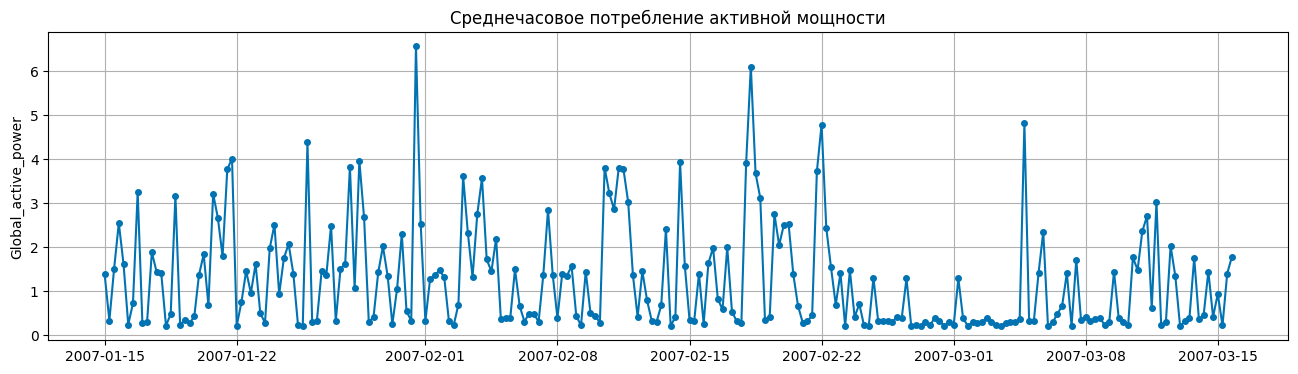

In [106]:
plt.figure(figsize=(25,6))
plot_series(df2m.Global_active_power)
plt.title('Среднечасовое потребление активной мощности')
plt.grid()